# **Cardiovascular** **disease**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')
fr=pd.read_csv('gdrive/My Drive/framingham.csv')
fr.head() #to preview the loaded data

Mounted at /content/gdrive


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
fr.shape # to see the number of data entries

(4238, 16)

In [4]:
# Target Variable = TenYearCHD (binary)

#Features are 
#if a person is male or female(nominal type of data)
#If the person smokes or not currently(nominal type of data), if he does than how many cigarettes per day he/she consumes!(a continous data)
#There's information of person's past medical issues in the columns [BPMeds, prevalentStoke, prevalentHyp, diabetes] in form of nominal data.
#There's information about person's current medical condition in columns [totChol,sysBP,diaBP,BMI,heartRate,glucose] in form of continuous data.

#fr=fr.drop['education',1]
#because education is not a required data 
#fr.head()

In [5]:
#Performing basic EDA on data to find interesting patterns and observations

#Starting with finding missing variables 
#total percentage of missing data
missing_data = fr.isnull().sum()
tot_per = (missing_data.sum()/fr.shape[0]) * 100
print(f'Missing data in percentage = {(tot_per)}%')


Missing data in percentage = 15.219443133553561%


            Total  Percentage
glucose       388    9.155262
education     105    2.477584
BPMeds         53    1.250590
totChol        50    1.179802
cigsPerDay     29    0.684285
BMI            19    0.448325
heartRate       1    0.023596


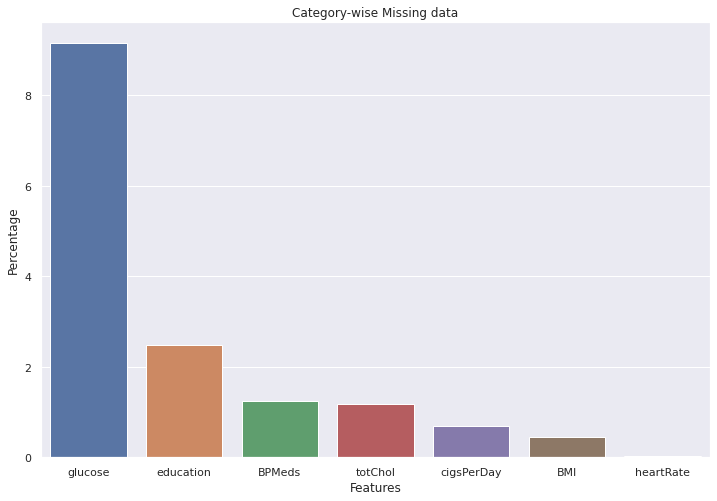

In [6]:
# missing data category wise 
total = fr.isnull().sum().sort_values(ascending=False)
percent_total = (fr.isnull().sum()/fr.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
print(missing_data)

#plotting the missing data category wise
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Category-wise Missing data')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.show()


In [7]:
#Through Table and plot we can see category glucose has highest percentage of missing data

fr.dropna(axis=0, inplace=True)  #Drop the missing data for better analysis
fr.shape    # we can see that data has been droped off

(3656, 16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


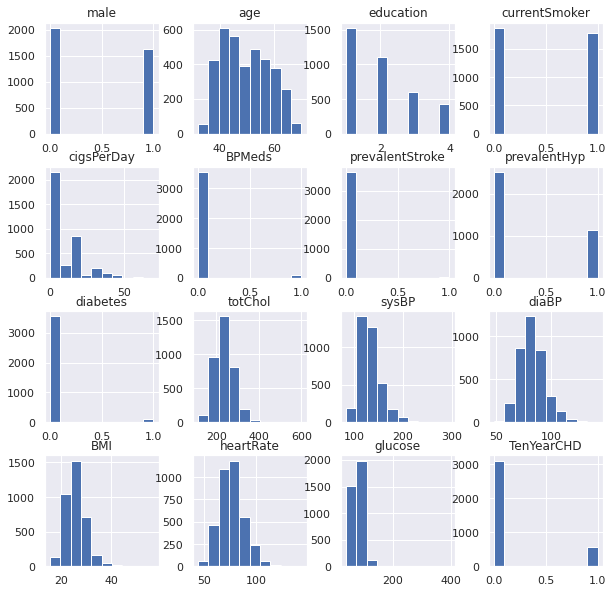

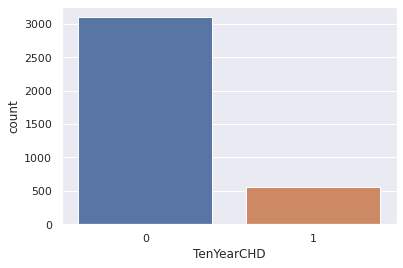

Patients without heart disease: 3099 ; patients with heart disease:557 


In [8]:
# histogram for analysing data distribution 

figure = plt.figure(figsize = (10,10))
ax = figure.gca()
fr.hist(ax = ax)
plt.show()
#We observe some data sets[prevalentStroke, diabetes, and BPMeds] are poorly distributed
# Case counts
sns.countplot(data=fr,x='TenYearCHD')
plt.show()
cases = fr.TenYearCHD.value_counts()
print(f"Patients without heart disease: {cases[0]} ; patients with heart disease:{cases[1]} ")
# Number of people without the disease exceeds the number of people with the disease

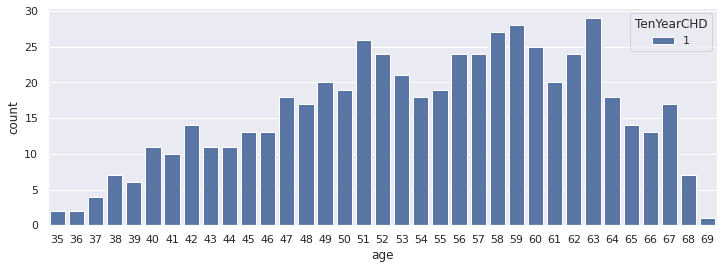

In [9]:
#Relation of CHD with each variable

#Number of people with CHD vs age
positive_cases = fr[fr['TenYearCHD'] == 1]
plt.figure(figsize=(12,4))
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD')
plt.show()
#Observation : more people are suffering with disease in age range of 51-63

In [10]:
# Number of people with CHD vs Sex
# Number of people with CHD vs currentSmokers
# Number of people with CHD vs diabetes
# Number of people with CHD vs BPMeds
#fr.plot(x='BPMeds', kind='bar', stacked=True,
 #       title='Stacked Bar Graph by dataframe')
# Number of people with CHD vs Hypertension

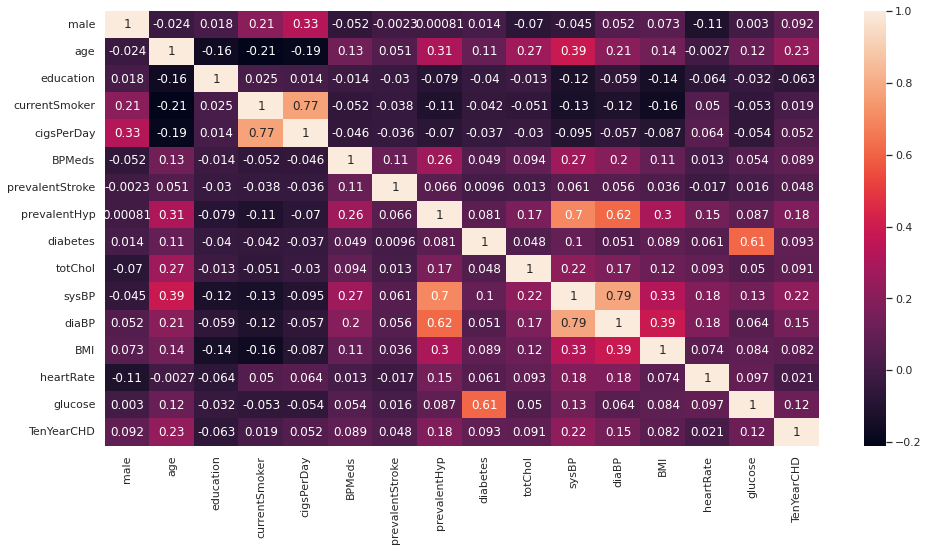

In [11]:
# Correlation heat map
plt.figure(figsize=(16,8))
sns.heatmap(fr.corr(), annot= True)
plt.show()
#the variables with the highest correlations are age, prevalent hypertension and systolic blood pressure
#about other variables, we can't take them to predict TenYearCHD
#Variables correlated to each other : [Blood glucose and diabetes; sysBP and diaBP; currentSmoker and cigsPerDay]

In [ ]:
#With all this basic EDA we have found relations and distribution of variables.